In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

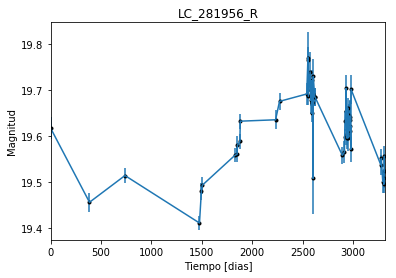

In [2]:
data = np.genfromtxt('LC_281956_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_281956_R')
plt.savefig("LC_281956_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

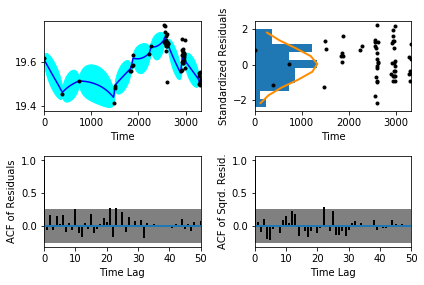

In [5]:
sample.assess_fit()

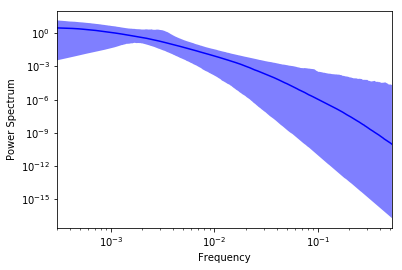

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

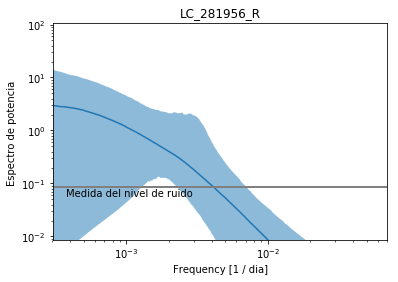

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_281956_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_281956_R')

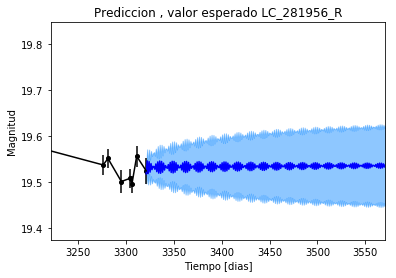

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_281956_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_281956_R')

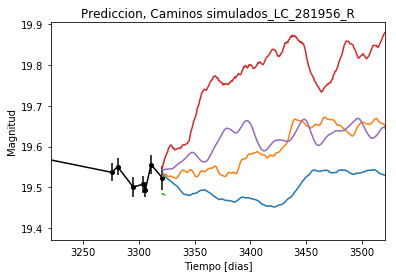

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_281956_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


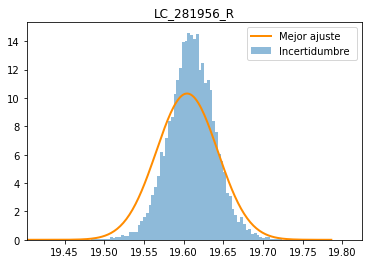

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_281956_R')
plt.savefig("Mejor_ajuste_LC_281956_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_281956_R')

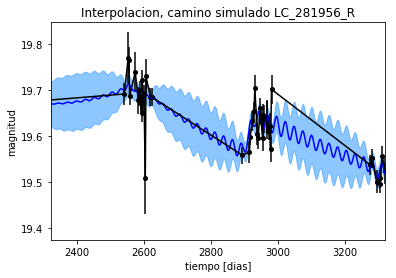

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_R')

Text(0.5,1,'Interpolacion, camino simulado LC_281956_R')

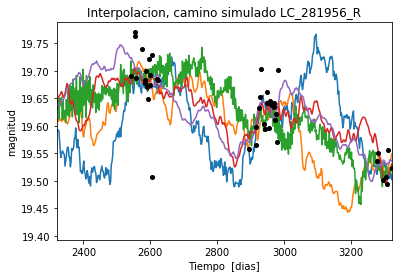

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 333.909701027
Median: 0.0140846788234
Standard deviation: 0.206690086011
68% credibility interval: [ 0.00105532  0.19959895]
95% credibility interval: [  3.57454450e-04   7.90042481e-01]
99% credibility interval: [  3.18151533e-04   9.80318812e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 548.36866704
Median: 0.00284230997421
Standard deviation: 0.104337862558
68% credibility interval: [ 0.00047272  0.04204122]
95% credibility interval: [  3.22187140e-04   3.65410888e-01]
99% credibility interval: [  3.06995316e-04   7.36959240e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1233.23742014
Median: 0.035794741542
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 697.828206814
Median: 118.638810117
Standard deviation: 1.71297296265
68% credibility interval: [ 116.74463103  119.97794263]
95% credibility interval: [ 114.35032569  120.9088119 ]
99% credibility interval: [ 112.40254866  121.53188029]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 588.363789476
Median: 0.885826243009
Standard deviation: 2.27292284047
68% credibility interval: [ 0.10690167  4.33266476]
95% credibility interval: [ 0.02261233  7.68620044]
99% credibility interval: [ 0.01223205  9.99337216]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 402.119262809
Median: 0.908732474602
Standard deviation: 10.6255269891
68% credibility interval: [  0.02806324  13.06219401]
95% credibility interval: [  1.36676806e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 628.401693849
Median: 9.48548988424e-20
Standard deviation: 2.30167506084e+149
68% credibility interval: [  1.73084176e-105   1.50389332e+063]
95% credibility interval: [  1.61525348e-213   1.72098461e+107]
99% credibility interval: [  1.78742481e-221   1.08310736e+144]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1711.57787545
Median: 19.5695079862
Standard deviation: 0.040764787531
68% credibility interval: [ 19.5331914   19.60363418]
95% credibility interval: [ 19.48290602  19.64606407]
99% credibility interval: [ 19.43798845  19.69067318]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 241.230449497
Median: 0.0147622866118
Standard deviation: 0.280097739033
68% credibility interval: [ 0.          0.49334372]
95% credibility interval: [ 0.          0.95501215]
99% credibility interval: [ 0.          1.03317511]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 241.230449497
Median: 0.0147622866118
Standard deviation: 0.280097739033
68% credibility interval: [ 0.          0.49334372]
95% credibility interval: [ 0.          0.95501215]
99% credibility interval: [ 0.          1.03317511]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1186.75490475
Median: 0.0
Standard deviation: 0.00074150453601
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 697.828206814
Median: 118.638810117
Standard deviation: 1.71297296265
68% credibility interval: [ 116.74463103  119.97794263]
95% credibility interval: [ 114.35032569  120.9088119 ]
99% credibility interval: [ 112.40254866  121.53188029]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1712.35452616
Median: 0.00815094794316
Standard deviation: 0.00814165145936
68% credibility interval: [ 0.00522527  0.01479764]
95% credibility interval: [ 0.00345262  0.02723719]
99% credibility interval: [ 0.00281825  0.04640865]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1112.76313013
Median: 1.27889160295
Standard deviation: 0.221177161896
68% credibility interval: [ 1.0824315   1.52625556]
95% credibility interval: [ 0.92037526  1.7835404 ]
99% credibility interval: [ 0.82230441  1.91947636]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 679.423998603
Median: 9.08652764744e-05
Standard deviation: 0.113935509889
68% credibility interval: [  6.85401492e-66   9.22655377e-03]
95% credibility interval: [  2.82805579e-110   2.41387310e-001]
99% credibility interval: [  5.27658462e-148   7.84849560e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 333.909701027
Median: (-0.0884966470398-1.6327836954j)
Standard deviation: 2.18719417903
68% credibility interval: [-1.25411719-3.33860247j -0.00663079-0.00411488j]
95% credibility interval: [ -4.96398331e+00+0.j          -2.24595255e-03-0.00172514j]
99% credibility interval: [ -6.15952475e+00+0.j          -1.99900504e-03-0.00201243j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 548.36866704
Median: (-0.0178587602684+1.29518040973j)
Standard deviation: 1.87804327874
68% credibility interval: [-0.26415276+2.18731515j -0.00297020+0.131437j  ]
95% credibility interval: [ -2.29594432e+00+2.08415187j  -2.02436150e-03+0.j        ]
99% credibility interval: [ -4.63045147e+00+4.05405996j  -1.92890846e-03+0.j        ]
Poster